# PLOTTING AND FUNCTIONS REVISITED


# OUTLINE

- Revisit Mod 1 project dataset / boston housing to perform EDA
- Create a high quality customized figure for EDA.
- Convert our plotting code into a working function.
- Take a step back and think about what we may want to change in the future

- **Breakout Rooms Activity: 15 minutes breakout rooms: Turning your own code into functions.**
    -  First 3-5 min, everyone pulls up their own project and looks for a figure they want to turn into a function.
    - Next 5 min: take turns sharing your screen and showing your partner the code you want to work on. 
        - Brainstorm together for 1 min on what customization/changes you want to add to your function. 
- Final 5 minutes, work on your function on your own computer, chatting and asking questions of each other and showing result, as needed/appropriate.

- **Return to main room, discuss any questions thats arose during the activity that we want to discuss.**
- With whatever time is remianing, we will touch on some more tips/best practices for functions.

###  Matplotlib Refs
- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')

-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

- [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters.


### **Matplotlib Documentation**
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)




## Matplotlib Anatomy / Structure
<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure
        - `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`
    - Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.
    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
  

# Group Activity:
- Let's build an EDA figure together
- Let's turn it into a function.
- Let's add a docstring
- Let's add some more customization / flexibility.


In [1]:
!pip install -U fsds_100719
from IPython.display import clear_output
clear_output()
from fsds_100719.imports import *

fsds_1007219  v0.4.35 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


## Let's build an EDA figure together


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

In [3]:
## OPTION 1: MOD 1 DATASET
df = fs.datasets.load_mod1_proj()
df.drop(['id','date'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

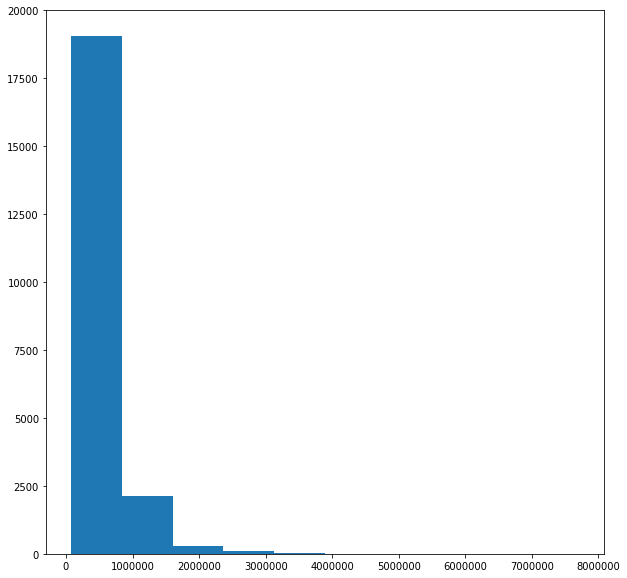

In [15]:
fig, ax = plt.subplots()
ax.hist(df['price'])

In [18]:
ax.get_xticks()
ax.set_xticks()

array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
        5000000.,  6000000.,  7000000.,  8000000.,  9000000.])

- Multicollinearity
- Histogram/distplot
- Scatter / Regplot 


In [0]:
df = fs.datasets.load_boston()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


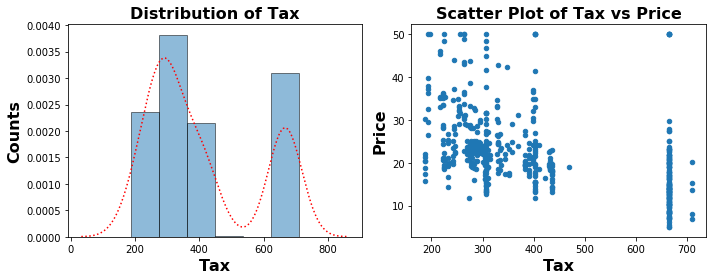

In [0]:
# Use variables to hold names of dataframe columns to plot
col='TAX'
target='price'



## Make Figure, Axes
fig,axes = plt.subplots(ncols=2,figsize=(10,4))

## Make subplot 1 on ax[0]
title_1 = f"Distribution of {col.title()}"    
## Make dict of keywords for seaborn > hist_kws & kde_kws
hist_kws = {'alpha':0.5,'edgecolor':'black'}
kde_kws={'color':'red','ls':':'}

# Feed in column, hist and kde kwds, and ax
sns.distplot(df[col], hist_kws=hist_kws, kde_kws=kde_kws,ax=axes[0])

## CUSTOMIZE SUBPLOT 1 AX
ax = axes[0]

## Set X/Y Label fontdicts
label_font = {'weight':'semibold','size':16}
tick_font = {'size':12,'ha':'center','rotation':45}

ax.set_ylabel('Counts', fontdict=label_font)
ax.set_xlabel(col.title(), fontdict=label_font)
ax.set_title(title_1, fontdict=label_font)



## Make subplot 2 on ax[1]
title_2 = f"Scatter Plot of {col.title()} vs {target.title()}"
df.plot(kind='scatter',x=col,y=target, ax=axes[1])


## TICKS: 
# Somethings are changed using tickparams
# i.e. axes[0].xaxis.set_tick_params(**{'rotation':45})
# axes[0].set_xticklabels(axes[0].get_xticklabels(), fontdict=tick_font)#,rotation=45)

## CUSTOMIZE SUBPLOT 1 AX
ax = axes[1]
ax.set_ylabel(target.title(), fontdict=label_font)
ax.set_xlabel(col.title(), fontdict=label_font)
ax.set_title(title_2, fontdict=label_font)

## Make subplot 2 on ax[1]
plt.tight_layout()

## Let's turn it into a function.


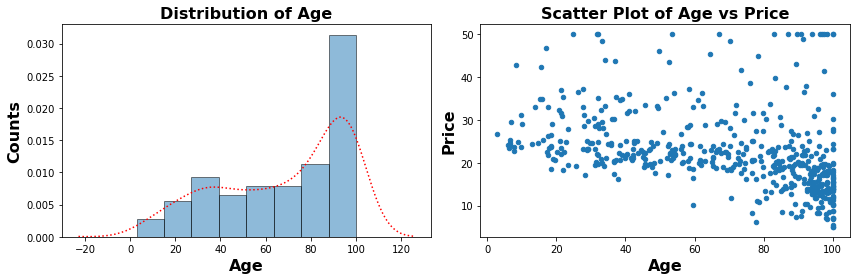

In [0]:
 ## 
def eda_function(df,col = "AGE",target='price',hist_kws=None, kde_kws={'color':'red','ls':':'},figsize=(12,4)):
    """Plots a seaborn displot for column with customization.
    Args:
     df (df)
     col (str)
     hist_kws (dict)
     kde_kws (dict) Accepts properties of https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
     figsize (dict)
    
    Returns:
        fig (matplotlib Figure)
        ax (list of Matplotlib Axes)

    Ex: 
    >> df = fs.datasets.load_boston()
    >> bathroom_break(df)
    """
    ## Fill in default hist_kws
    if hist_kws is None:
        hist_kws = {'alpha':0.5,'edgecolor':'black'}

    ## Set X/Y Label fonts
    label_font = {'weight':'semibold','size':16}
    tick_font = {'size':12,'ha':'center','rotation':45}


    ## Make Figure, Axes
    fig,axes = plt.subplots(ncols=2,figsize=figsize)

    ## Make subplot 1 on ax[0]
    title_1 = f"Distribution of {col.title()}"    
    sns.distplot(df[col], hist_kws=hist_kws, kde_kws=kde_kws,ax=axes[0])

    ## CUSTOMIZE SUBPLOT 1 AX
    ax = axes[0]
    ax.set_ylabel('Counts', fontdict=label_font)
    ax.set_xlabel(col.title(), fontdict=label_font)
    ax.set_title(title_1, fontdict=label_font)



    ## Make subplot 2 on ax[1]
    title_2 = f"Scatter Plot of {col.title()} vs {target.title()}"
    df.plot(kind='scatter',x=col,y=target, ax=axes[1])


    ## TICKS: 
    # Somethings are changed using tickparams
    # i.e. axes[0].xaxis.set_tick_params(**{'rotation':45})
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), fontdict=tick_font)#,rotation=45)
    
    ## CUSTOMIZE SUBPLOT 1 AX
    ax = axes[1]
    ax.set_ylabel(target.title(), fontdict=label_font)
    ax.set_xlabel(col.title(), fontdict=label_font)
    ax.set_title(title_2, fontdict=label_font)
    ## Make subplot 2 on ax[1]
    plt.tight_layout()

    return fig, axes

fig, ax = eda_function(df)


## BREAKOUT ROOM ACTIVITY


- Activity: 15 minutes breakout rooms: Turning your own code into functions.
    -  First 3-5 min, everyone pulls up their own project and looks for a figure they want to turn into a function.
    - Next 5 min: take turns sharing your screen and showing your partner the code you want to work on. 
        - Brainstorm together for 1 min on what customization/changes you want to add to your function. 
    - Final 5 minutes, work on your function on your own computer, chatting and asking questions of each other and showing result, as needed/appropriate.

# Misc. Notes re: Functions


**Functions**:
- try,except,finally
- raising Exceptions

- Using `verbose` to control outputs:
    - `verbose=0,1,2`
    - `if verbose: display(...)`
- Using 'isinstance'




**1. `try,except,finally`**
```python
try:
    some_func_that_may_error(inputs)
except:
    what_to_do_when_error_happens
    # note: good place to print type, shape, etc. to help diagnose errors
finally: #optional
    run_this_code_no_matter_what
```
- Note: **if you don't want anything to happen** if there's an error, then just make `except:` be a `pass` command.
    
```python
try:
    some_func_that_may_error(inputs)
except:
    
    msg = f"the shape was {inputs.shape}"
    raise Exception(msg)
    pass

```
- Additionally, you can specify what TYPE of errors to handle:
    
```python
try: 
    function_that_calls_a_var(data=my_var) # if my_var doesn't exist, will raise a `NameError`
except NameError:
    my_var = func_to_create_var()
```


**2. raising Exceptions:**
    - You can write your own errors + error msgs in your function
    - This is helpful for giving the user specific information as to how to resolve the error.
    
    
```python
def my_func(arg1, arg2,option_1=True, option_2=False, option_3=False):
    """Function takes arg1, arg2 and then processes it according to which
    option==True. """
    
    # check if >1 parameter is True:
    if np.sum([option_1, option_2,option_3])>1: 
        raise Exception('Only 1 of option_1,option_2,option_3 may be True')
    ...
```

**3. Using verbose**

    - a general practice is to specify verbosity as 0,1,2.
        - 0 being little-to-no details, 1 being more, 2 being the most details.
    - Can be very good for troubleshooting or for print outs that provde/demonstrate what the function did/generated.
    
```python
def my_func(arg1,arg2,verbose=1):
   if verbose: # if verbose==either 1 or 2
        print(arg1.shape,arg2.shape)
    ...
    
```

**4. Using `isinstance` instead of `type==`:**

- Using `type(var)==class_you_want` is not very helpful
    - There's a lot of types that it will not recognize
    - There's an entire `types` module you could import into Python
- What's better is using `isinstance(var_youre_checking,'list')`

```python
if isinstance(my_var,'list'):
    do_this_stuff...

# Note, for types from outside packages, you will need to reference the class in the library.

import pandas as pd
if isinstance(my_var, pd.DataFrame):
    do_this_stuff...
```
- What nice about using this in your functions is that **you can code-in the correct way of handling the input to make it compatible** with the rest of your function, instead of just raising an Error.

i.e. User inputs a single string or a Series instead of a list of strings:
```python
import pandas as pd
if isinstance(input_var,'list') == False:
    
    if isinstance(input_var,'str'):
        input_var = [input_var]
    elif isinstance(input_var, pd.Series):
        input_var=list(input_var)
        
    ## Now input_var should be in list form and you can loop like normal
    for entry in input_var:
        ...
```

